In [13]:
#MSE vs サーチケース
from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error, roc_auc_score, r2_score

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neural_network import MLPRegressor
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

#reaction length
df = pd.read_excel('/mnt/c/CEA/all_mixtureexp15.xlsx')

l1=['Fuel','Diluent','Equivalentratio','CoefficientDiluent','Oxidizer','P0', 'T0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]',
       'Ea[KJ/kg]',
       'Lr',]

XpcaFLRDED = pd.DataFrame({'P0':df['P0']})

for i in range(len(l1)):
    XpcaFLRDED[l1[i]]=df[l1[i]]

XpcaFLRDED = XpcaFLRDED[~( XpcaFLRDED['Ea[KJ/kg]'] == 0)]

dfH2train =  XpcaFLRDED[~( XpcaFLRDED['Fuel'] == 'H2') | ~( XpcaFLRDED['Equivalentratio'] == 1)]
dfH2test = XpcaFLRDED[(XpcaFLRDED['Fuel'] == 'H2') & (XpcaFLRDED['Equivalentratio'] == 1)]

dfC2H2train =  dfH2train[~( dfH2train['Fuel'] == 'C2H2') | ~( dfH2train['Equivalentratio'] == 1) | ~(dfH2train['Diluent'].isnull())]
dfC2H2test =  dfH2train[(dfH2train['Fuel'] == 'C2H2') & (dfH2train['Equivalentratio'] == 1) & (dfH2train['Diluent'].isnull())]

dfC2H4train =  dfC2H2train[~( dfC2H2train['Fuel'] == 'C2H4') | ~( dfC2H2train['Equivalentratio'] == 1) | ~(dfC2H2train['Diluent'].isnull())]
dfC2H4test =  dfC2H2train[(dfC2H2train['Fuel'] == 'C2H4') & (dfC2H2train['Equivalentratio'] == 1) & (dfC2H2train['Diluent'].isnull())]

dfC2H6train =  dfC2H4train[~( dfC2H4train['Fuel'] == 'C2H6') | ~(dfC2H4train['Equivalentratio'] == 1) | ~(dfC2H4train['Diluent'].isnull()) | ~(dfC2H4train['Oxidizer'] == 'O2')]
dfC2H6test =  dfC2H4train[(dfC2H4train['Fuel'] == 'C2H6') & (dfC2H4train['Equivalentratio'] == 1) & (dfC2H4train['Diluent'].isnull()) & (dfC2H4train['Oxidizer'] == 'O2')]

dfC2H2ARtrain =  dfC2H6train[~( dfC2H6train['Fuel'] == 'C2H2') | ~( dfC2H6train['Diluent'] == 'Ar') | ~(dfC2H6train['CoefficientDiluent'] == 7)]
dfC2H2ARtest = dfC2H6train[(dfC2H6train['Fuel'] == 'C2H2') & (dfC2H6train['Diluent'] == 'Ar') & (dfC2H6train['CoefficientDiluent'] == 7)]

dftrainval =  dfC2H2ARtrain[~( dfC2H2ARtrain['Fuel'] == 'C2H4') | ~( dfC2H2ARtrain['Diluent'] == 'Ar') | ~(dfC2H2ARtrain['CoefficientDiluent'] == 4)]
dfC2H4ARtest = dfC2H2ARtrain[(dfC2H2ARtrain['Fuel'] == 'C2H4') & (dfC2H2ARtrain['Diluent'] == 'Ar') & (dfC2H2ARtrain['CoefficientDiluent'] == 4)]

dftrainval = dftrainval.sample(frac=1)

P0range = '0.7>P0>0.5'
P0range1 = '0.3>P0>0.2'
print(dfC2H2test)
dfH2test = dfH2test.query(P0range)
dfC2H2test = dfC2H2test.query(P0range)
dfC2H4test = dfC2H4test.query(P0range)
dfC2H6test = dfC2H6test.query(P0range)
dfC2H2ARtest = dfC2H2ARtest.query(P0range)
dfC2H4ARtest = dfC2H4ARtest.query(P0range)

print(dfC2H2test)

X_train = dftrainval.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr'])
XH2test = dfH2test.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr'])
XC2H2test = dfC2H2test.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr'])
XC2H4test = dfC2H4test.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr'])
XC2H6test = dfC2H6test.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr'])
XC2H2ARtest = dfC2H2ARtest.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr'])
XC2H4ARtest  = dfC2H4ARtest.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr'])

y_train = dftrainval['Lr']
yH2test = dfH2test['Lr']
yC2H2test = dfC2H2test['Lr']
yC2H4test = dfC2H4test['Lr']
yC2H6test = dfC2H6test['Lr']
yC2H2ARtest = dfC2H2ARtest['Lr']
yC2H4ARtest = dfC2H4ARtest['Lr']

ss = StandardScaler()
sX_train = ss.fit_transform(X_train)
sX_train = pd.DataFrame(sX_train,columns=X_train.columns)


         P0  Fuel Diluent  Equivalentratio  CoefficientDiluent Oxidizer  \
392  0.0500  C2H2     NaN              1.0                 NaN       O2   
393  0.0500  C2H2     NaN              1.0                 NaN       O2   
394  0.0500  C2H2     NaN              1.0                 NaN       O2   
395  0.0500  C2H2     NaN              1.0                 NaN       O2   
396  0.1000  C2H2     NaN              1.0                 NaN       O2   
397  0.1200  C2H2     NaN              1.0                 NaN       O2   
398  0.1500  C2H2     NaN              1.0                 NaN       O2   
399  0.2000  C2H2     NaN              1.0                 NaN       O2   
400  0.3000  C2H2     NaN              1.0                 NaN       O2   
401  0.5000  C2H2     NaN              1.0                 NaN       O2   
402  0.6500  C2H2     NaN              1.0                 NaN       O2   
403  0.0810  C2H2     NaN              1.0                 NaN       O2   
404  0.0831  C2H2     NaN

In [14]:
sol = ['adam']
act = ['relu']
hidd = []

for i in [6]:
    for j in [200]:
        b=[j]*i
        b=tuple(b)
        hidd.append(b)

alp=[1e-4]
param_grid = {'solver':sol,'activation':act,'hidden_layer_sizes':hidd,'alpha':alp}
grid1=GridSearchCV(MLPRegressor(), param_grid ,cv=2, n_jobs=4)
grid1.fit(sX_train,y_train)

print('Best parameters: {}'.format(grid1.best_params_))
print('Best cross-validation: {}'.format(grid1.best_score_))

/home/hiroki/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/hiroki/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (200, 200, 200, 200, 200, 200), 'solver': 'adam'}
Best cross-validation: 0.9400594126126649


/home/hiroki/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [15]:
X_train = X_train.query(P0range)

print(XC2H2test)
sX_train = ss.transform(X_train)
sXH2test = ss.transform(XH2test)
sXC2H2test = ss.transform(XC2H2test)
sXC2H4test = ss.transform(XC2H4test)
sXC2H6test = ss.transform(XC2H6test)
sXC2H2ARtest = ss.transform(XC2H2ARtest)
sXC2H4ARtest = ss.transform(XC2H4ARtest)

       P0      T0  H0[KJ/kg]  M0[kg/kmol]   γ0[-]  pcj[bar]   Tcj[K]  \
402  0.65  289.35    2142.42       30.296  1.3323     22.29  4111.07   

     Hcj[KJ/kg]  Mcj[kg/kmol]  γcj[-]  Mcj[-]   Tvn[K]   Ea[KJ/kg]  
402     4181.03        23.151  1.1497   7.388  2307.64  468.725127  


<Figure size 720x720 with 0 Axes>

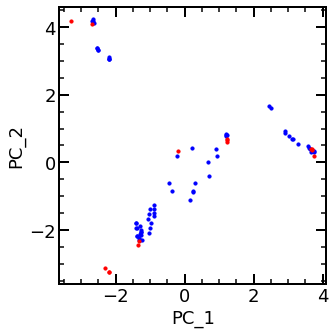

In [31]:
from sklearn.decomposition import PCA
# データの分布を主成分分析（PCA）で表現してみる
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(sX_train)
X_testH2_pca = pca.transform(sXH2test)
X_testC2H2_pca = pca.transform(sXC2H2test)
X_testC2H4_pca = pca.transform(sXC2H4test)
X_testC2H6_pca = pca.transform(sXC2H6test)
X_testC2H2AR_pca = pca.transform(sXC2H2ARtest)
X_testC2H4AR_pca = pca.transform(sXC2H4ARtest)

from sklearn.svm import OneClassSVM
# One class support vector machine (OCSVM) モデルを構築する
clf = OneClassSVM(nu = 0.2)
y_train_class = clf.fit_predict(X_train_pca)
y_test_classH2 = clf.predict(X_testH2_pca)
y_test_classC2H2 = clf.predict(X_testC2H2_pca)
y_test_classC2H4 = clf.predict(X_testC2H4_pca)
y_test_classC2H6 = clf.predict(X_testC2H6_pca)
y_test_classC2H2Ar = clf.predict(X_testC2H2AR_pca)
y_test_classC2H4Ar = clf.predict(X_testC2H4AR_pca)

# フォントを変更
plt.rcParams["font.family"] = "Arial"

# Plot のインスタンスと図の大きさを定義
fig = plt.figure(figsize = (10, 10))

# インスタンスの中に複数のグラフを作る場合に指定
# 引数は（行数、列数、具体的に作りたい図のインデックス）
# グラフを 1 つだけ作りたいときは (1, 1, 1)としてやれば良い

plt.figure(figsize=(5,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

plt.scatter(X_train_pca[y_train_class == 1, 0], X_train_pca[y_train_class == 1, 1],s=10,color='blue')
plt.scatter(X_train_pca[y_train_class == -1, 0], X_train_pca[y_train_class == -1, 1],s=10,color='red')

plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.tight_layout()
plt.savefig("gurafu1(OCSVM).png")

/home/hiroki/.local/lib/python3.8/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/hiroki/.local/lib/python3.8/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


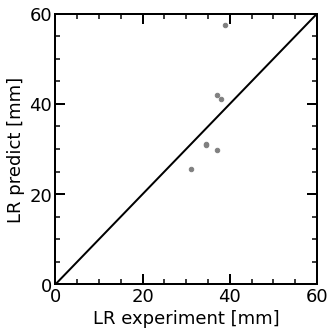

In [32]:
sX_train = ss.fit_transform(X_train)
sXH2test = ss.transform(XH2test)
sXC2H2test = ss.transform(XC2H2test)
sXC2H4test = ss.transform(XC2H4test)
sXC2H6test = ss.transform(XC2H6test)
sXC2H2ARtest = ss.transform(XC2H2ARtest)
sXC2H4ARtest = ss.transform(XC2H4ARtest)

resultH2=grid1.predict(sXH2test)
MSEH2=mean_squared_error(yH2test, resultH2)
R2H2=r2_score(yH2test,resultH2)

resultC2H2=grid1.predict(sXC2H2test)
MSEC2H2=mean_squared_error(yC2H2test, resultC2H2)
R2C2H2=r2_score(yC2H2test,resultC2H2)

resultC2H4=grid1.predict(sXC2H4test)
MSEC2H4=mean_squared_error(yC2H4test, resultC2H4)
R2C2H4=r2_score(yC2H4test,resultC2H4)

resultC2H6=grid1.predict(sXC2H6test)
MSEC2H6=mean_squared_error(yC2H6test, resultC2H6)
R2C2H6=r2_score(yC2H6test,resultC2H6)

resultC2H2AR=grid1.predict(sXC2H2ARtest)
MSEC2H2AR=mean_squared_error(yC2H2ARtest, resultC2H2AR)
R2C2H2AR=r2_score(yC2H2ARtest,resultC2H2AR)

resultC2H4AR=grid1.predict(sXC2H4ARtest)
MSEC2H4AR=mean_squared_error(yC2H4ARtest, resultC2H4AR)
R2C2H4AR=r2_score(yC2H4ARtest,resultC2H4AR)

plt.figure(figsize=(5,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5


plt.plot([0, 60], [0, 60],color='black')

# データをプロットする
plt.scatter(yH2test[y_test_classH2 == 1], resultH2[y_test_classH2 == 1],s=20,color='grey', label = "AD_inside")
plt.scatter(yH2test[y_test_classH2 == -1], resultH2[y_test_classH2 == -1],s=20,color='black', label = "AD_outside")
#plt.scatter(yC2H2test[y_test_classC2H2 == 1], resultC2H2[y_test_classC2H2 == 1],s=20,color='grey', label = "AD_inside")
#plt.scatter(yC2H2test[y_test_classC2H2 == -1], resultC2H2[y_test_classC2H2 == -1],s=20,color='black', label = "AD_outside")
#plt.scatter(yC2H4test[y_test_classC2H4 == 1], resultC2H4[y_test_classC2H4 == 1],s=20,color='grey', label = "AD_inside")
#plt.scatter(yC2H4test[y_test_classC2H4 == -1], resultC2H4[y_test_classC2H4 == -1],s=20,color='black', label = "AD_outside")
#plt.scatter(yC2H6test[y_test_classC2H6 == 1], resultC2H6[y_test_classC2H6 == 1],s=20,color='grey', label = "AD_inside")
#plt.scatter(yC2H6test[y_test_classC2H6 == -1], resultC2H6[y_test_classC2H6 == -1],s=20,color='black', label = "AD_outside")
#plt.scatter(yC2H2ARtest[y_test_classC2H2Ar == 1], resultC2H2AR[y_test_classC2H2Ar == 1],s=20,color='grey', label = "AD_inside")
#plt.scatter(yC2H2ARtest[y_test_classC2H2Ar == -1], resultC2H2AR[y_test_classC2H2Ar == -1],s=20,color='black', label = "AD_outside")
#plt.scatter(yC2H4ARtest[y_test_classC2H4Ar == 1], resultC2H4AR[y_test_classC2H4Ar == 1],s=20,color='grey', label = "AD_inside")
#plt.scatter(yC2H4ARtest[y_test_classC2H4Ar == -1], resultC2H4AR[y_test_classC2H4Ar == -1],s=20,color='black', label = "AD_outside")

plt.xlim(0, 60)
plt.ylim(0, 60)
plt.xticks(np.arange(0, 61, step=20))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel('LR experiment [mm]')
plt.ylabel('LR predict [mm]')
plt.tight_layout()
plt.savefig("gurafu2(OCSVM).png")

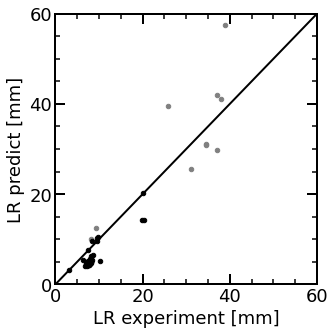

In [33]:
plt.figure(figsize=(5,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5


plt.plot([0, 60], [0, 60],color='black')

# データをプロットする
plt.scatter(yH2test[y_test_classH2 == 1], resultH2[y_test_classH2 == 1],s=20,color='grey', label = "AD_inside")
plt.scatter(yH2test[y_test_classH2 == -1], resultH2[y_test_classH2 == -1],s=20,color='black', label = "AD_outside")
plt.scatter(yC2H2test[y_test_classC2H2 == 1], resultC2H2[y_test_classC2H2 == 1],s=20,color='grey', label = "AD_inside")
plt.scatter(yC2H2test[y_test_classC2H2 == -1], resultC2H2[y_test_classC2H2 == -1],s=20,color='black', label = "AD_outside")
plt.scatter(yC2H4test[y_test_classC2H4 == 1], resultC2H4[y_test_classC2H4 == 1],s=20,color='grey', label = "AD_inside")
plt.scatter(yC2H4test[y_test_classC2H4 == -1], resultC2H4[y_test_classC2H4 == -1],s=20,color='black', label = "AD_outside")
plt.scatter(yC2H6test[y_test_classC2H6 == 1], resultC2H6[y_test_classC2H6 == 1],s=20,color='grey', label = "AD_inside")
plt.scatter(yC2H6test[y_test_classC2H6 == -1], resultC2H6[y_test_classC2H6 == -1],s=20,color='black', label = "AD_outside")
plt.scatter(yC2H2ARtest[y_test_classC2H2Ar == 1], resultC2H2AR[y_test_classC2H2Ar == 1],s=20,color='grey', label = "AD_inside")
plt.scatter(yC2H2ARtest[y_test_classC2H2Ar == -1], resultC2H2AR[y_test_classC2H2Ar == -1],s=20,color='black', label = "AD_outside")
plt.scatter(yC2H4ARtest[y_test_classC2H4Ar == 1], resultC2H4AR[y_test_classC2H4Ar == 1],s=20,color='grey', label = "AD_inside")
plt.scatter(yC2H4ARtest[y_test_classC2H4Ar == -1], resultC2H4AR[y_test_classC2H4Ar == -1],s=20,color='black', label = "AD_outside")

plt.xlim(0, 60)
plt.ylim(0, 60)
plt.xticks(np.arange(0, 61, step=20))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel('LR experiment [mm]')
plt.ylabel('LR predict [mm]')
plt.tight_layout()
plt.savefig("gurafu2(OCSVM).png")

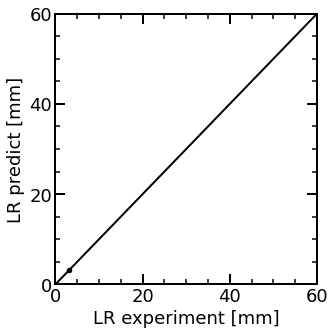

In [30]:
plt.figure(figsize=(5,5))
plt.plot([0, 60], [0, 60],color='black')

# データをプロットする
plt.scatter(yC2H2test[y_test_classC2H2 == 1], resultC2H2[y_test_classC2H2 == 1],s=20,color='grey', label = "AD_inside")
plt.scatter(yC2H2test[y_test_classC2H2 == -1], resultC2H2[y_test_classC2H2 == -1],s=20,color='black', label = "AD_outside")
plt.xlim(0, 60)
plt.ylim(0, 60)
plt.xticks(np.arange(0, 61, step=20))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel('LR experiment [mm]')
plt.ylabel('LR predict [mm]')
plt.tight_layout()
plt.savefig("gurafu2(OCSVM).png")

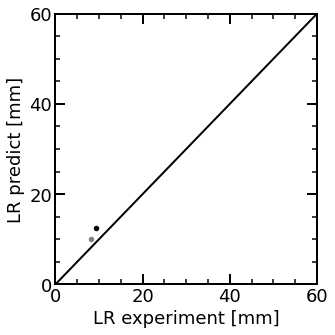

In [23]:
plt.figure(figsize=(5,5))
plt.plot([0, 60], [0, 60],color='black')

# データをプロットする
plt.scatter(yC2H4test[y_test_classC2H4 == 1], resultC2H4[y_test_classC2H4 == 1],s=20,color='grey', label = "AD_inside")
plt.scatter(yC2H4test[y_test_classC2H4 == -1], resultC2H4[y_test_classC2H4 == -1],s=20,color='black', label = "AD_outside")
#plt.scatter(yC2H6test[y_test_classC2H6 == 1], resultC2H6[y_test_classC2H6 == 1],s=20,color='grey', label = "AD_inside")
#plt.scatter(yC2H6test[y_test_classC2H6 == -1], resultC2H6[y_test_classC2H6 == -1],s=20,color='black', label = "AD_outside")
#plt.scatter(yC2H2ARtest[y_test_classC2H2Ar == 1], resultC2H2AR[y_test_classC2H2Ar == 1],s=20,color='grey', label = "AD_inside")
#plt.scatter(yC2H2ARtest[y_test_classC2H2Ar == -1], resultC2H2AR[y_test_classC2H2Ar == -1],s=20,color='black', label = "AD_outside")
#plt.scatter(yC2H4ARtest[y_test_classC2H4Ar == 1], resultC2H4AR[y_test_classC2H4Ar == 1],s=20,color='grey', label = "AD_inside")
#plt.scatter(yC2H4ARtest[y_test_classC2H4Ar == -1], resultC2H4AR[y_test_classC2H4Ar == -1],s=20,color='black', label = "AD_outside")

plt.xlim(0, 60)
plt.ylim(0, 60)
plt.xticks(np.arange(0, 61, step=20))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel('LR experiment [mm]')
plt.ylabel('LR predict [mm]')
plt.tight_layout()
plt.savefig("gurafu2(OCSVM).png")

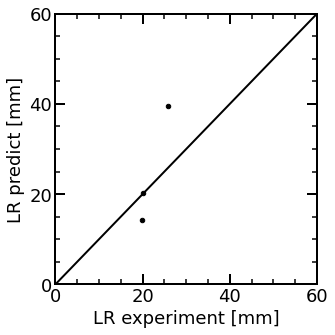

In [25]:
plt.figure(figsize=(5,5))
plt.plot([0, 60], [0, 60],color='black')

# データをプロットする
plt.scatter(yC2H6test[y_test_classC2H6 == 1], resultC2H6[y_test_classC2H6 == 1],s=20,color='grey', label = "AD_inside")
plt.scatter(yC2H6test[y_test_classC2H6 == -1], resultC2H6[y_test_classC2H6 == -1],s=20,color='black', label = "AD_outside")
#plt.scatter(yC2H2ARtest[y_test_classC2H2Ar == 1], resultC2H2AR[y_test_classC2H2Ar == 1],s=20,color='grey', label = "AD_inside")
#plt.scatter(yC2H2ARtest[y_test_classC2H2Ar == -1], resultC2H2AR[y_test_classC2H2Ar == -1],s=20,color='black', label = "AD_outside")
#plt.scatter(yC2H4ARtest[y_test_classC2H4Ar == 1], resultC2H4AR[y_test_classC2H4Ar == 1],s=20,color='grey', label = "AD_inside")
#plt.scatter(yC2H4ARtest[y_test_classC2H4Ar == -1], resultC2H4AR[y_test_classC2H4Ar == -1],s=20,color='black', label = "AD_outside")

plt.xlim(0, 60)
plt.ylim(0, 60)
plt.xticks(np.arange(0, 61, step=20))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel('LR experiment [mm]')
plt.ylabel('LR predict [mm]')
plt.tight_layout()
plt.savefig("gurafu2(OCSVM).png")

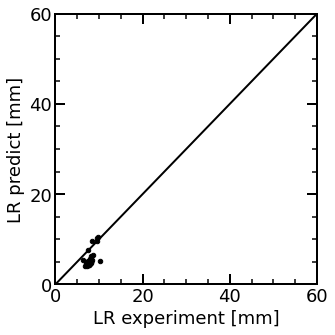

In [26]:
plt.figure(figsize=(5,5))
plt.plot([0, 60], [0, 60],color='black')

# データをプロットする
plt.scatter(yC2H2ARtest[y_test_classC2H2Ar == 1], resultC2H2AR[y_test_classC2H2Ar == 1],s=20,color='grey', label = "AD_inside")
plt.scatter(yC2H2ARtest[y_test_classC2H2Ar == -1], resultC2H2AR[y_test_classC2H2Ar == -1],s=20,color='black', label = "AD_outside")
#plt.scatter(yC2H4ARtest[y_test_classC2H4Ar == 1], resultC2H4AR[y_test_classC2H4Ar == 1],s=20,color='grey', label = "AD_inside")
#plt.scatter(yC2H4ARtest[y_test_classC2H4Ar == -1], resultC2H4AR[y_test_classC2H4Ar == -1],s=20,color='black', label = "AD_outside")

plt.xlim(0, 60)
plt.ylim(0, 60)
plt.xticks(np.arange(0, 61, step=20))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel('LR experiment [mm]')
plt.ylabel('LR predict [mm]')
plt.tight_layout()
plt.savefig("gurafu2(OCSVM).png")

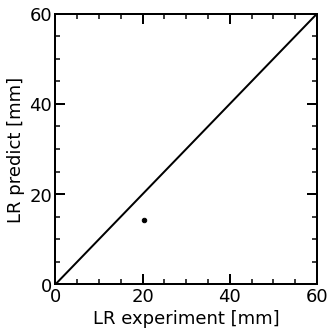

In [28]:
plt.figure(figsize=(5,5))
plt.plot([0, 60], [0, 60],color='black')

# データをプロットする
plt.scatter(yC2H4ARtest[y_test_classC2H4Ar == 1], resultC2H4AR[y_test_classC2H4Ar == 1],s=20,color='grey', label = "AD_inside")
plt.scatter(yC2H4ARtest[y_test_classC2H4Ar == -1], resultC2H4AR[y_test_classC2H4Ar == -1],s=20,color='black', label = "AD_outside")

plt.xlim(0, 60)
plt.ylim(0, 60)
plt.xticks(np.arange(0, 61, step=20))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel('LR experiment [mm]')
plt.ylabel('LR predict [mm]')
plt.tight_layout()
plt.savefig("gurafu2(OCSVM).png")